Averages the 2-m minimum air temperature over land (either >50° or 65° N) for each year (with cosine weighted mean) and then creates a 21-year running mean. The three ensembles get averaged for CCT, MSB and SAI. The result is a figure that shows the development of the Arctic (or >50°N) land minimum temeperature over time.

The code is currently for the region >50°N, to change it to >65°N, 74:96 needs to be adjusted to 82:96.

In [1]:
path = r"E:\Datasets_Geoengineering\JS_files_new_sel_var/"
path2 = r"E:\Datasets_Geoengineering/JS_files_RCP_85/"
path3 = r"E:\Datasets_Geoengineering\RCP45_variables/"


import iris
#import Mean_Time_Series ## Without running mean

import Min_clm_2_single as Mean_Time_Series ## With running mean

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore") ## To ignore UserWarning about collapsing a non-contagious variable

variable = "TREFMNAV" ## for TS (T_mean) --> no landmask!!!!!

landmask = iris.load(path + "TSA_01_sel_var_CCT.all.nc")[0][:,74:96,:]

CCT_01 = iris.load(path + variable + "_01_sel_var_CCT.all.nc")[0][12:,74:96,:]
CCT_02 = iris.load(path + variable + "_02_sel_var_CCT.all.nc")[0][12:,74:96,:]
CCT_03 = iris.load(path + variable + "_03_sel_var_CCT.all.nc")[0][:,74:96,:]

CCT_mean, CCT1_mean, CCT2_mean, CCT3_mean = Mean_Time_Series.rfg_mean_clm(CCT_01, CCT_02, CCT_03, "")

MSB_01 = iris.load(path + variable + "_01_sel_var_MSB.all.nc")[0][:,74:96,:]
MSB_02 = iris.load(path + variable + "_02_sel_var_MSB.all.nc")[0][:,74:96,:]
MSB_03 = iris.load(path + variable + "_03_sel_var_MSB.all.nc")[0][:,74:96,:]


MSB_mean, MSB1_mean, MSB2_mean, MSB3_mean = Mean_Time_Series.rfg_mean_clm(MSB_01, MSB_02, MSB_03, "")

SAI_01 = iris.load(path + variable + "_01_sel_var_SAI.all.nc")[0][:,74:96,:]
SAI_02 = iris.load(path + variable + "_02_sel_var_SAI.all.nc")[0][:,74:96,:]
SAI_03 = iris.load(path + variable + "_03_sel_var_SAI.all.nc")[0][:,74:96,:]


SAI_mean, SAI1_mean, SAI2_mean, SAI3_mean = Mean_Time_Series.rfg_mean_clm(SAI_01, SAI_02, SAI_03, "")

RCP = iris.load(path2 + variable + "_sel_var_RCP85.all.nc")[0][:,74:96,:]

RCP_mean = Mean_Time_Series.rcp_mean_clm(RCP, "")

RCP45 = iris.load(path3 + "TREFMNAV_RCP45.all.nc")[0][:,74:96,:]
RCP45.data.mask = landmask.data.mask

RCP45_mean = Mean_Time_Series.rcp_mean_clm(RCP45, "")

RFG_years = list(range(2030+10, 2091+10))
RCP_years = list(range(2016+10, 2091+10))
CCT_years = list(range(2031+10, 2091+10))



To fill the ensemble spread, the min and max of the ensambles per index for each RFG is calculated.

In [2]:
CCT_Tmean_max = []
CCT_Tmean_min = []
MSB_Tmean_max = []
MSB_Tmean_min = []
SAI_Tmean_max = []
SAI_Tmean_min = []

for i in range(0, len(CCT1_mean)):
    CCT_Tmean_max.append(max(CCT1_mean[i], CCT2_mean[i], CCT3_mean[i] ))
    CCT_Tmean_min.append(min(CCT1_mean[i], CCT2_mean[i], CCT3_mean[i]))    
for i in range(0, len(MSB2_mean)):
    MSB_Tmean_max.append(max(MSB1_mean[i], MSB2_mean[i], MSB3_mean[i]))
    MSB_Tmean_min.append(min(MSB1_mean[i], MSB2_mean[i], MSB3_mean[i]))
    SAI_Tmean_max.append(max(SAI1_mean[i], SAI2_mean[i], SAI3_mean[i]))
    SAI_Tmean_min.append(min(SAI1_mean[i], SAI2_mean[i], SAI3_mean[i]))


Plotting of the data

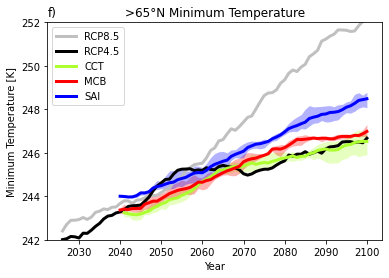

In [3]:

plt.fill_between(CCT_years, CCT_Tmean_max, CCT_Tmean_min, color = "greenyellow", alpha = 0.3, lw=0)
plt.fill_between(RFG_years, MSB_Tmean_max, MSB_Tmean_min, color = "red", alpha = 0.3, lw=0)
plt.fill_between(RFG_years, SAI_Tmean_max, SAI_Tmean_min, color = "blue", alpha = 0.3, lw=0)
plt.plot(RCP_years, RCP_mean, color = "#C0C0C0", label = "RCP8.5", linewidth=3.0) #  - RCP_mean[0]
plt.plot(RCP_years, RCP45_mean, color = "black", label = "RCP4.5", linewidth=3.0) #  - RCP_mean[0]
plt.plot(CCT_years, CCT_mean, color = "greenyellow", label = "CCT", linewidth=3.0)
plt.plot(RFG_years, MSB_mean, color = "red", label = "MCB", linewidth=3.0)
plt.plot(RFG_years, SAI_mean, color = "blue", label = "SAI", linewidth=3.0)
#plt.plot([2016, 2091],[287.1533607606747 + 1.5, 287.1533607606747 + 1.5])
plt.xlabel("Year")
plt.ylabel("Minimum Temperature [K]")
plt.title(">50°N Minimum Temperature")
plt.title("e)",  loc = "left")

# plt.xlim(-0.1,2.2)
plt.ylim(249,259)
plt.legend(loc = 2)
#plt.show()

plt.savefig(r"C:\Users\rhonda\OneDrive\Dokumente\Uni-DESKTOP-8400FCB\Master Thesis\Figures for Paper\Tmin_2m_50.png",bbox_inches='tight', facecolor='w')


Print the difference of each RFG to RCP4.5 at the end of the century (last index).

In [4]:
print("End of century difference CCT:",CCT_mean[-1] - RCP45_mean[-1])
print("End of century difference MCB:",MSB_mean[-1] - RCP45_mean[-1])
print("End of century difference SAI:",SAI_mean[-1] - RCP45_mean[-1])
print(RCP45_mean[-1] - RCP45_mean[-1])

End of century difference CCT: -0.15077911861357052
End of century difference MCB: 0.3100464835999617
End of century difference SAI: 1.8129093230716649
0.0


Store data in csv file.

In [5]:
import pandas as pd
d = dict(RFG_years = RFG_years, RCP_years = RCP_years, CCT_years = CCT_years, RCP_mean = RCP_mean, RCP45_mean = RCP45_mean, CCT_mean = CCT_mean, CCT_Tmean_max = CCT_Tmean_max, CCT_Tmean_min = CCT_Tmean_min, MSB_mean = MSB_mean, MSB_Tmean_max = MSB_Tmean_max, MSB_Tmean_min = MSB_Tmean_min, SAI_mean = SAI_mean, SAI_Tmean_max = SAI_Tmean_max, SAI_Tmean_min = SAI_Tmean_min)
df = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in d.items() ]))
# df.to_excel(r'C:\Users\rhonda\OneDrive\Dokumente\Uni-DESKTOP-8400FCB\Master Thesis\Excel_Files\ED_Fig_3.xlsx', index = False)




from openpyxl import load_workbook

path = r"C:\Users\rhonda\OneDrive\Dokumente\Uni-DESKTOP-8400FCB\Master Thesis\Excel_Files\Source_Data.xlsx"

book = load_workbook(path)
writer = pd.ExcelWriter(path, engine = 'openpyxl')
writer.book = book


df.to_excel(writer, sheet_name = 'ED_Figure_2_e')
writer.close()